In [ ]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.style.use('seaborn-darkgrid')
# Change the font ?
font = {'size'   : 15}
plt.rc('font', **font)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import getpass
import pickle
import random

In [3]:
import sys

sys.path.append("../")

import allpoetry

Add your [allpoetry.com](allpoetry.com) credentials here:

In [4]:
username = getpass.getpass("Enter your username: ")
password = getpass.getpass("Enter your password: ")

api = allpoetry.AllPoetry(username, password)

Enter your username:  ······
Enter your password:  ········


# Fetch an author

In [26]:
AUTHOR_NAME = "Sylvia Plath"

author = api.get_author(AUTHOR_NAME)

print(author)

<Author: Sylvia Plath>


You can retrieve the biography, or details, relevant to the author with ``info`` attribute.

In [27]:
print(author.info)

Born in 1932 to middle class parents in Jamaica Plain, Massachusetts, Sylvia Plath published her first poem at the age of eight. A sensitive person who tended to be a bit of a perfectionist she was what many would consider a model daughter and student popular, a straight A student, always winning the best prizes. She won a scholarship to Smith College in 1950 and even then she had an enviable list of publications. While at Smith she wrote over four hundred poems.However, beneath the surface of her seeming perfection were some grave discontinuities, some which probably were caused by the death of her father, an entomologist, when she was eight. During the summer after her junior year in college, Sylvia made her first (and almost successful) attempt at suicide by overdosing on sleeping pills. The experience is described in her autobiographical novel, The Bell Jar , published in 1963. After a period of recovery, which involved electroshock and psychotherapy she once again pursued academic

# Get famous authors

In [31]:
authors = api.get_famous_authors(top_k=10)

Author 10/10: 100%|█████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.08it/s, name=Walt Whitman]


In [33]:
authors

[<Author: Maya Angelou>,
 <Author: Robert Frost>,
 <Author: William Shakespeare>,
 <Author: Pablo Neruda>,
 <Author: Emily Dickinson>,
 <Author: William Wordsworth>,
 <Author: Edgar Allan Poe>,
 <Author: Rabindranath Tagore>,
 <Author: Sylvia Plath>,
 <Author: Walt Whitman>]

# Fetch a specific poem 

We can get a specific poem if we know it's URL. This will get the poem text and some metadata.

In [37]:
url = "https://allpoetry.com/poem/8498499-Mirror-by-Sylvia-Plath"
poem = api.get_poem_from_url(url)

The poem itself is saved:

In [38]:
print(poem)

Mirror
¯¯¯¯¯¯

“I am silver and exact. I have no preconceptions.
Whatever I see I swallow immediately
Just as it is, unmisted by love or dislike.
I am not cruel, only truthful
The eye of a little god, four cornered.
Most of the time I meditate on the opposite wall.
It is pink, with speckles. I have looked at it so long
I think it is part of my heart. But it flickers.
Faces and darkness separate us over and over.

Now I am a lake. A woman bends over me,
Searching my reaches for what she really is.
Then she turns to those liars, the candles or the moon.
I see her back, and reflect it faithfully.
She rewards me with tears and an agitation of hands.
I am important to her. She comes and goes.
Each morning it is her face that replaces the darkness.
In me she has drowned a young girl, and in me an old woman
Rises toward her day after day, like a terrible fish.”

— Sylvia Plath
  Likes: 229, Views: 355,400


In [8]:
print(poem.author)

Sylvia Plath


# Fetch a list of poems

First, we fetch the list of poems written by the user. 

In [39]:
AUTHOR_NAME = "Sylvia_Plath"

poems = api.get_poems(AUTHOR_NAME, top_k=10)

Poem 10/10: 100%|██████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.12s/it, title=Edge]


Then, we can fetch the individual poems. We'll grab 10 at random from the list. 

In [40]:
selection = random.sample(poems, 3)

for poem in selection:
    print(poem)
    print()

Tulips
¯¯¯¯¯¯

“The tulips are too excitable, it is winter here.
Look how white everything is, how quiet, how snowed in
I am learning peacefulness, lying by myself quietly
As the light lies on these white walls, this bed, these hands.
I am nobody; I have nothing to do with explosions.
I have given my name and my day clothes up to the nurses
And my history to the anaesthetist and my body to surgeons.

They have propped my head between the pillow and the sheet cuff
Like an eye between two white lids that will not shut.
Stupid pupil, it has to take everything in.
The nurses pass and pass, they are no trouble,
They pass the way gulls pass inland in their white caps,
Doing things with their hands, one just the same as another,
So it is impossible to tell how many there are.

My body is a pebble to them, they tend it as water
Tends to the pebbles it must run over, smoothing them gently.
They bring me numbness in their bright needles, they bring me sleep.
Now I have lost myself I am sick of b

Then, we can look at information stored with the poems:

In [11]:
for poem in poems:
    print(f"Tags: {poem.tags}, Poem length: {len(poem)}")

Tags: [], Poem length: 170
Tags: [], Poem length: 438
Tags: [], Poem length: 531
Tags: [], Poem length: 109
Tags: [], Poem length: 631
Tags: [], Poem length: 606
Tags: [], Poem length: 179
Tags: [], Poem length: 194
Tags: [], Poem length: 141
Tags: [], Poem length: 122


We can aggregate these results to understand what kinds of poems this author writes:

In [12]:
tag_counts = dict()
for poem in poems:
    tags = poem.tags
    if tags == []:
        tags = ['None']
    for tag in tags:
        if tag in tag_counts:
            tag_counts[tag] += 1
        else:
            tag_counts[tag] = 1

In [13]:
tag_counts

{'None': 10}

# Fetch all of a user's poems and save as pickle 

In [30]:
AUTHOR_NAME = "Sharon Olds"

poems = api.get_poems(AUTHOR_NAME)

Poem 35/35: 100%|████████████████████████████████████████████████████| 35/35 [00:21<00:00,  1.63it/s, title=The Unborn]


In [15]:
with open(f"../data/{AUTHOR_NAME.replace(' ', '_').lower()}.pkl", "wb") as file:
    pickle.dump(poems, file)

In [16]:
with open(f"../data/{AUTHOR_NAME.replace(' ', '_').lower()}.pkl", "rb") as file:
    poems = pickle.load(file)

## Word counts and cloud 

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter

In [18]:
mystopwords = [",", "!", ".", ";", "-", "'", "'s", 
               "''", "...", "'re", ":", "``", "(", "?", 
               ")", "n't", "'ve", "'m", "ca", "like", "'ll", "'d", "wo", "ta"] + stopwords.words("english")

In [20]:
words = []
for poem in poems:
    words += [word.lower() for word in word_tokenize(poem.text) if word.lower() not in mystopwords]
counts = dict(Counter(words))

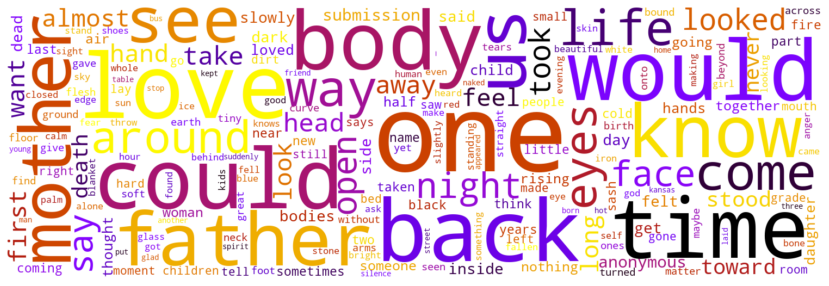

In [21]:
wordcloud = WordCloud(
    collocations=False, 
    width=1500, 
    height=500, 
    random_state=21, 
    max_font_size=200, 
    background_color="white", 
    colormap="gnuplot"
).generate_from_frequencies(counts)

fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Get all categories of poems

In [6]:
api.get_categories()

{'acrostic': 'https://allpoetry.com/poems/about/Acrostic',
 'africa': 'https://allpoetry.com/poems/about/Africa',
 'alone': 'https://allpoetry.com/poems/about/Alone',
 'america': 'https://allpoetry.com/poems/about/America',
 'angel': 'https://allpoetry.com/poems/about/Angel',
 'anger': 'https://allpoetry.com/poems/about/Anger',
 'animal': 'https://allpoetry.com/poems/about/Animal',
 'anniversary': 'https://allpoetry.com/poems/about/Anniversary',
 'april': 'https://allpoetry.com/poems/about/April',
 'august': 'https://allpoetry.com/poems/about/August',
 'autumn': 'https://allpoetry.com/poems/about/Autumn',
 'baby': 'https://allpoetry.com/poems/about/Baby',
 'ballad': 'https://allpoetry.com/poems/about/Ballad',
 'beach': 'https://allpoetry.com/poems/about/Beach',
 'beautiful': 'https://allpoetry.com/poems/about/Beautiful',
 'beauty': 'https://allpoetry.com/poems/about/Beauty',
 'believe': 'https://allpoetry.com/poems/about/Believe',
 'bipolar': 'https://allpoetry.com/poems/about/Bipolar'